In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# CIFAR-10 dataset
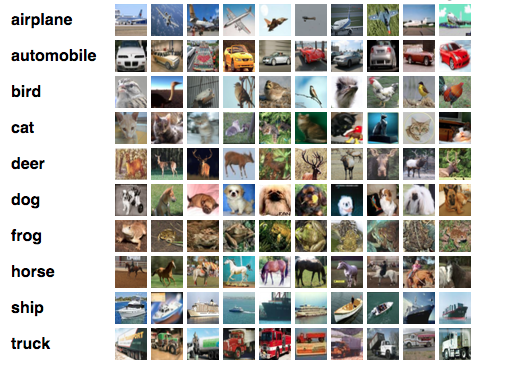


* This dataset consists of 60000 32 x 32 colour images in 10 classes,with 6000 image per class

In [2]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#loading cifar-10 dataset
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [5]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (50000, 32, 32, 3)
X_test: (10000, 32, 32, 3)
y_train: (50000, 1)
y_test: (10000, 1)


In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

# EXPLORING THE DATA

In [15]:
classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

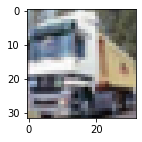

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [18]:
classes[y_train[1]]

'truck'

In [23]:
def plot_sample(x,y,index):
    
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y_train[index]])
    

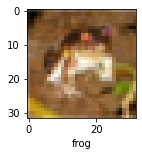

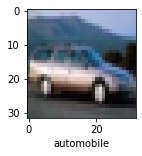

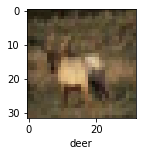

In [26]:
plot_sample(X_train,y_train,0)
plot_sample(X_train,y_train,4)
plot_sample(X_train,y_train,3)

In [27]:
#normalizing the data
X_train=X_train/255
X_test=X_test/255

# Building the ANN model

In [37]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)



Epoch 1/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8101 - accuracy: 0.3560 - val_loss: 1.6612 - val_accuracy: 0.4184
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6246 - accuracy: 0.4252 - val_loss: 1.6000 - val_accuracy: 0.4359
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5411 - accuracy: 0.4566 - val_loss: 1.5226 - val_accuracy: 0.4593
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.4800 - accuracy: 0.4795 - val_loss: 1.5630 - val_accuracy: 0.4418
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4324 - accuracy: 0.4962 - val_loss: 1.5206 - val_accuracy: 0.4519
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3882 - accuracy: 0.5112 - val_loss: 1.4414 - val_accuracy: 0.4872
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3499 - accuracy: 0.5247 - val_loss: 1.4035 -

**AFTER PERFORMING ANN ON CIFAR-10 DATASET**
* TRAINING_ACCURACY=55%
* TESTING_ACCURACY=48%

# BUILDING CNN MODEL

In [53]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax')
])

In [54]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [55]:
cnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3008 - accuracy: 0.5456 - val_loss: 1.2451 - val_accuracy: 0.5691
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0223 - accuracy: 0.6437 - val_loss: 1.0641 - val_accuracy: 0.6362
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9205 - accuracy: 0.6824 - val_loss: 1.0894 - val_accuracy: 0.6335
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8481 - accuracy: 0.7066 - val_loss: 1.1891 - val_accuracy: 0.5894
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7958 - accuracy: 0.7243 - val_loss: 1.3054 - val_accuracy: 0.5782
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7526 - accuracy: 0.7372 - val_loss: 0.9301 - val_accuracy: 0.6858
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7187 - accuracy: 0.7498 - val_loss: 0.8834 -

**AFTER PERFORMING CNN ON CIFAR-10 DATASET**
* TRAINING_ACCURACY=75%
* TESTING_ACCURACY=69%

# PREDICTING MODEL

In [56]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.0034480e-04, 1.8271306e-03, 4.7471275e-04, 4.7330239e-01,
        9.7249076e-04, 8.4884405e-02, 1.0418963e-01, 1.6296821e-05,
        2.7829865e-01, 5.5933952e-02],
       [5.7949889e-03, 1.0605769e-02, 1.1883375e-05, 4.4037498e-07,
        2.8970896e-07, 2.5478735e-07, 6.6473682e-08, 2.0059851e-08,
        9.8212105e-01, 1.4652133e-03],
       [6.8097785e-02, 1.7625287e-01, 7.9464790e-04, 1.0305284e-02,
        2.7960006e-04, 1.4101559e-03, 6.2505329e-05, 2.6162207e-04,
        6.7347479e-01, 6.9060773e-02],
       [1.4278288e-01, 2.8572469e-03, 1.4404629e-03, 2.1005105e-04,
        9.6590217e-04, 1.8307293e-05, 2.0295028e-04, 6.3018520e-06,
        8.4655541e-01, 4.9605127e-03],
       [7.7642195e-05, 3.6766522e-03, 3.6927097e-02, 4.3096921e-01,
        3.4747861e-02, 6.2309722e-03, 4.8436147e-01, 4.0114173e-05,
        2.8205602e-03, 1.4846568e-04]], dtype=float32)

In [57]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 8, 6]

In [60]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

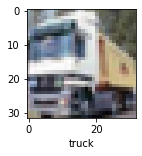

In [65]:
plot_sample(X_test, y_test,1)